# Case study on classification

### Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### import iris data

In [3]:
data=pd.read_excel(r"C:\Users\Lenovo\Downloads\iris (1).xls")
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

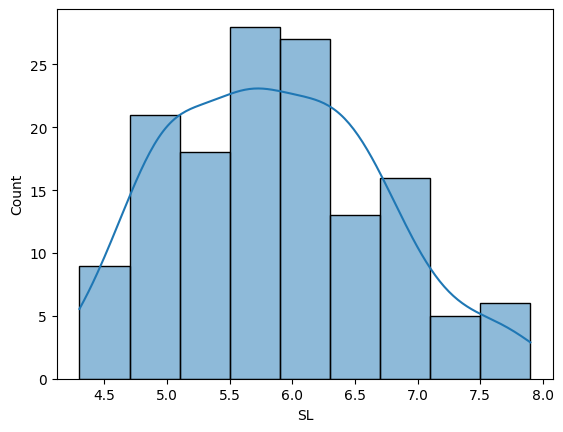

In [8]:
sns.histplot(data["SL"],kde=True)
plt.show()

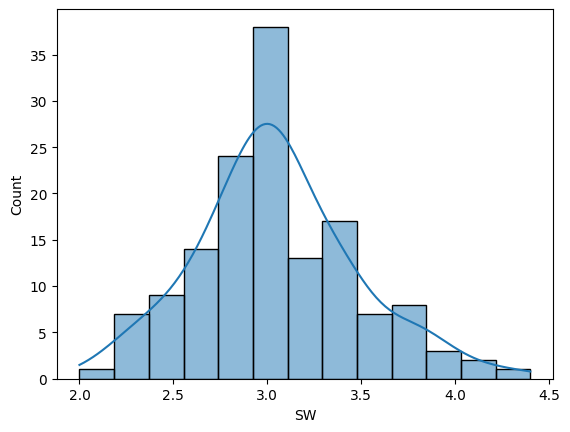

In [9]:
sns.histplot(data["SW"],kde=True)
plt.show()

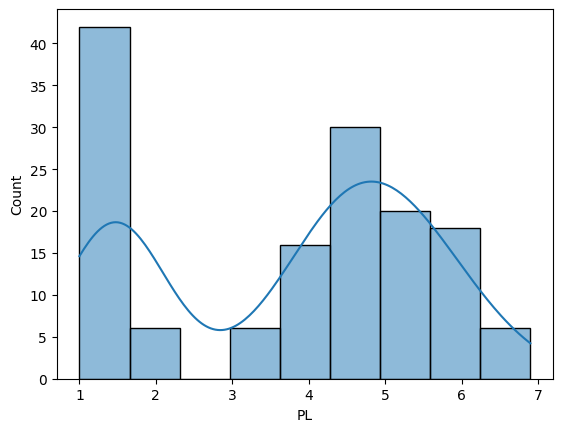

In [10]:
sns.histplot(data["PL"],kde=True)
plt.show()

## Handling null values

In [11]:
data["SL"]=data["SL"].fillna(data["SL"].mean())

In [12]:
data["SW"]=data["SW"].fillna(data["SW"].mean())

In [13]:
data["PL"]=data["PL"].fillna(data["PL"].median())

In [14]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

## Checking for outliers

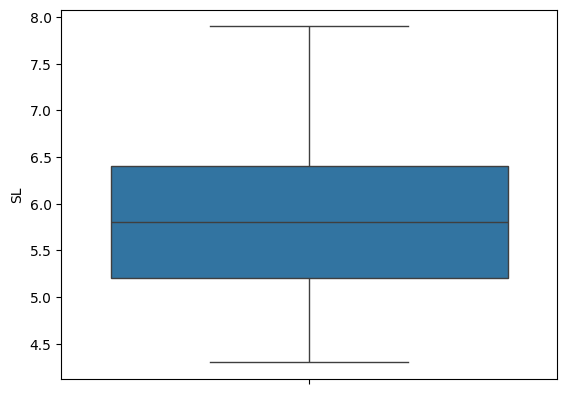

In [15]:
sns.boxplot(data["SL"])
plt.show()

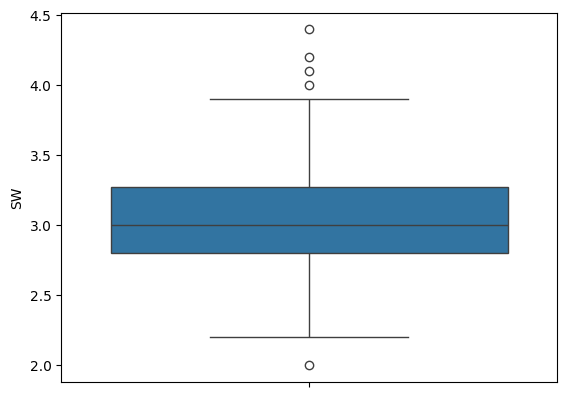

In [16]:
sns.boxplot(data["SW"])
plt.show()

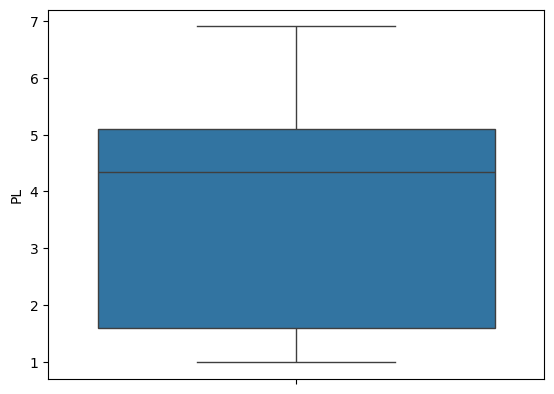

In [17]:
sns.boxplot(data["PL"])
plt.show()

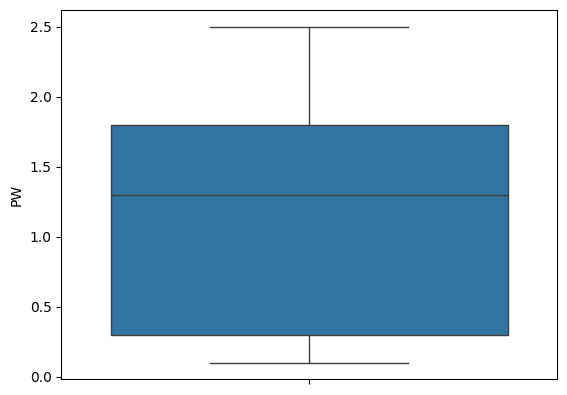

In [18]:
sns.boxplot(data["PW"])
plt.show()

## Handling outliers

In [19]:
Q1=np.percentile(data["SW"],25)
Q1

np.float64(2.8)

In [20]:
Q3=np.percentile(data["SW"],75)

Q3

np.float64(3.275)

In [21]:
IQR=Q3-Q1
IQR

np.float64(0.4750000000000001)

In [22]:
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR

In [23]:
lower_limit

np.float64(2.0874999999999995)

In [24]:
upper_limit

np.float64(3.9875)

In [25]:
outlier=[]
for x in data["SW"]:
    if x< lower_limit or x> upper_limit:
        outlier.append(x)

In [26]:
outlier

[4.0, 4.4, 4.1, 4.2, 2.0]

In [27]:
ind = (data["SW"] > upper_limit) | (data["SW"] < lower_limit)
data.loc[ind].index


Index([14, 15, 32, 33, 60], dtype='int64')

In [28]:
data.drop([14, 15, 32, 33, 60],inplace=True)

In [29]:
data.shape

(145, 5)

## Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Classification"]=le.fit_transform(data["Classification"])

In [31]:
data

,SL,SW,PL,PW,Classification
0,5.100000,3.5,1.40,0.2,0
1,4.900000,3.0,1.40,0.2,0
2,5.855944,3.2,1.30,0.2,0
3,4.600000,3.1,1.50,0.2,0
4,5.000000,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20,2.3,2
146,6.300000,2.5,5.00,1.9,2
147,6.500000,3.0,4.35,2.0,2
148,6.200000,3.4,5.40,2.3,2


### split the data 

In [32]:
x=data.drop(["Classification"],axis=1)
y=data["Classification"]

In [33]:
x

,SL,SW,PL,PW
0,5.100000,3.5,1.40,0.2
1,4.900000,3.0,1.40,0.2
2,5.855944,3.2,1.30,0.2
3,4.600000,3.1,1.50,0.2
4,5.000000,3.6,1.40,0.2
...,...,...,...,...
145,6.700000,3.0,5.20,2.3
146,6.300000,2.5,5.00,1.9
147,6.500000,3.0,4.35,2.0
148,6.200000,3.4,5.40,2.3


In [34]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 145, dtype: int64

### correlation matrix

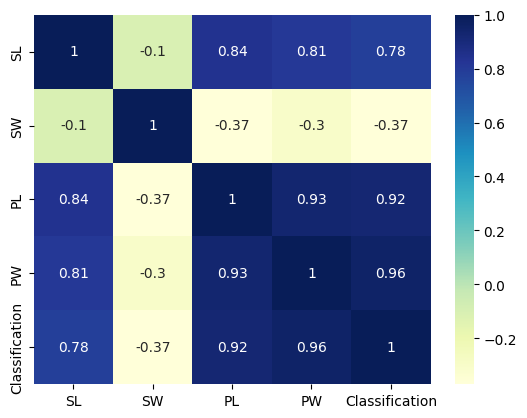

In [35]:
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

### train test split

In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.25,random_state=42)

### KNN Classification

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
metric_k=[]
neighbors=np.arange(2,15)
for k in neighbors:
  k_model=KNeighborsClassifier(n_neighbors=k)
  k_model.fit(x_train,y_train)
  k_pred=k_model.predict(x_test)
  acc=accuracy_score(y_test,k_pred)
  metric_k.append(acc)


    

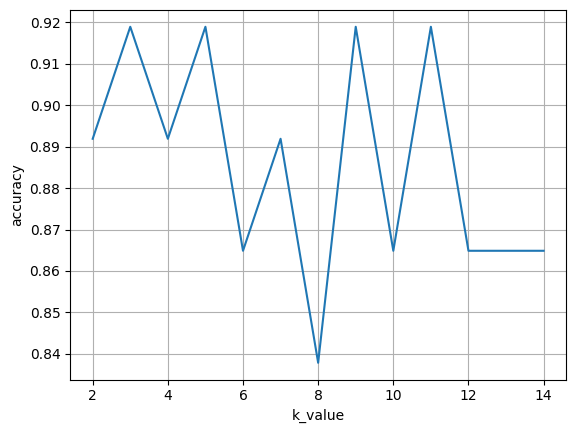

In [38]:
plt.plot(neighbors,metric_k)
plt.xlabel("k_value")
plt.ylabel("accuracy")
plt.grid()

In [39]:
k_model=KNeighborsClassifier(n_neighbors=5)
k_model.fit(x_train,y_train)
k_pred=k_model.predict(x_test)
acc=accuracy_score(y_test,k_pred)
acc

0.918918918918919

### SVM

In [40]:
from sklearn.svm import SVC
svm_model=SVC(kernel="linear")
svm_model.fit(x_train,y_train)
s_pred=svm_model.predict(x_test)

acc=accuracy_score(y_test,s_pred)
acc

0.918918918918919

### Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(random_state=42)
dt_model.fit(x_train,y_train)
d_pred=dt_model.predict(x_test)
acc=accuracy_score(y_test,d_pred)
acc

0.918918918918919

### Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(x_train,y_train)
r_pred=rf_model.predict(x_test)
acc=accuracy_score(y_test,r_pred)
acc

0.9459459459459459

### Naive bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(x_train,y_train)

#predict
y_pred = gnb.predict(x_test)
acc=accuracy_score(y_test,y_pred)
acc

0.9459459459459459